# MC886 Assigment 1

## Objective:
Use linear regression model to predict the prices of diamonds given their atributes. The data set might be found on:
https://www.kaggle.com/shivam2503/diamonds.


In [4]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [5]:
data_dir = '../data/diamonds.csv'

In [6]:
with open(data_dir, 'rb') as csvfile:
    dataset = pd.read_csv(data_dir)
    
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [7]:
#carat	cut	color	clarity	depth	table	price	x	y	z
# print(dataset['cut'])

## Preprocessing the data

### 1. Split data in training, validation and test
A wise person said: "friends don’t let friends use testing data for training".  Set bellow the sizes of each set.

**Note:**
* **sklearn.model_selection.train_test_split(*arrays, **options)**  
    Split arrays or matrices into random train and test subsets.  
    See documentation:http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

### 2. Put the dataset into Numpy volume
Categorical atributes are changed to integers.

In [8]:
#1. SPLIT DATASET
data_size = 53940        #change values here
train_size = 30000
validation_size = 10000
test_size = 13940

nx = 9                   #number of features of the input
ny = 1                   #number of fetures of the output

train,test_validation = train_test_split(dataset, test_size = validation_size + test_size)
validation, test = train_test_split(test_validation, test_size = test_size)

print ("data_size: ", data_size)
print ("train_size: ", train.shape[0])
print ("validation_size: ", validation.shape[0])
print ("test_size: ", test.shape[0])


#2. SAVE THE PANDA'S DATAFRAME ON NUMPY ARRAYS
categorical_labels = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

train_volume = np.empty(train.shape)
validation_volume = np.empty(validation.shape)
test_volume = np.empty(test.shape)

le = LabelEncoder()

# For each feature, copy or transforms and copy (in categorical case) to the correspondent volume
for i in range(len(categorical_labels)):
    if( i >= 1 and i <= 3): #if the feature is categorical
        train_volume [:,i] = le.fit_transform(train[categorical_labels[i]])
        validation_volume[:, i] = le.fit_transform(validation[categorical_labels[i]])
        test_volume[:, i] = le.fit_transform(test[categorical_labels[i]])
    else:
        train_volume[:,i] = train[categorical_labels[i]]
        validation_volume[:,i] = validation[categorical_labels[i]]
        test_volume[:,i] = test[categorical_labels[i]]

# Separates the input from the label organize data in (number_features, number_of_examples)
x_train = (train_volume[:, 0:9]).T
y_train = (train_volume[:, 9].reshape(train_size,1)).T
x_validation = validation_volume [:, 0:9].T
y_validation = validation_volume [:,9].reshape(ny, validation_size)
x_test = test_volume [:,0:9].T
y_test = test_volume [:,9].reshape(test_size,1).T

# Sanity check
assert(x_train.shape == (nx, train_size))
assert(y_train.shape == (ny, train_size))
assert(x_validation.shape == (nx, validation_size))
assert(y_validation.shape == (ny, validation_size))
assert(x_test.shape == (nx, test_size))
assert(y_test.shape == (ny, test_size))

data_size:  53940
train_size:  30000
validation_size:  10000
test_size:  13940


In [25]:
def init_parameters(X):
    """
    Receives: the input vector shape (nx, m), where nx is the number of features and
    m the number of examples.
    Returns:
    W: the weight array shape ( 1, nx)
    dW: the derivative array shape ( 1, nx)
    b: a real number (bias)
    db: the derivative os the bias.
    """
    nx = X.shape[0]
    W = np.random.randn(1,nx)
    dw = np.random.randn(1,nx)
    b = 0.
    db = 0.
    return W,b, dw, db

In [26]:
def l2_cost(X, Y, Y_hat, m):
    """
    Cost function defined by a variation of the l2 norm function.
    The '2' in the denominator makes the deriative easier
    """
    cost = (1/(2*m))*np.sum((Y-Y_hat)**2)
    return cost

In [27]:
#FORWARD PROPAGATION (WELL THIS IS NOT A NN, BUT ...)
def forward_prop(X, w, b):
    """
    X is the input vector with m training examples, shape (1,m)
    w: is the angular coefficient
    b: is the linear coefficient
    """
    Y_hat = np.dot(w,X) + b
    return Y_hat

In [28]:
def backward_propagation(X,Y, Y_hat, m):
    """
    Calculates the derivatives of the parameters
    returns:
    dw
    db
    """
    dw = (-1./m)*np.sum((Y -Y_hat)*X)
    db = (-1./m)*np.sum((Y -Y_hat))
    return dw, db

In [39]:
def GD_model(X,Y, num_iterations = 100, learning_rate = 0.000000001):
    """
    Given X and Y estimates the best linear function to fit the data
    """
    m = X.shape[1]
    print('m = ', m)
    
    w,b,dw,db = init_parameters(x_train)
    for iteration in range(num_iterations):
        
        #forward propagation (we can think the activation function as linear)
        Y_hat = forward_prop(X,w,b)
        
        #plot the cost function
        cost = l2_cost(X,Y, Y_hat,m)
        plt.plot(iteration,cost,'ro')
    
        #Backward propagation calculate the derivatives 
        dw, db = backward_propagation(X,Y,Y_hat, m)
    
        #Update parameters simultaneusly
        temp_w = w - learning_rate*dw
        temp_b = b - learning_rate*db
        w = temp_w
        b = temp_b
    plt.show()
    return w, b

m =  30000


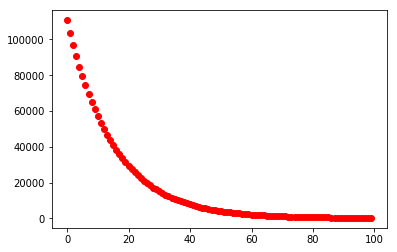

In [40]:
a_hat, b_hat = GD_model(x_train,y_train)